In [3]:
!wget http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz

--2024-05-08 01:04:13--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: 'maps.tar.gz.1'

maps.tar.gz.1       100%[===================>] 238.65M  4.70MB/s    in 64s     

2024-05-08 01:05:16 (3.75 MB/s) - 'maps.tar.gz.1' saved [250242400/250242400]



In [5]:
!tar -xvzf /kaggle/working/maps.tar.gz

maps/
maps/train/
maps/train/1.jpg
maps/train/10.jpg
maps/train/100.jpg
maps/train/1000.jpg
maps/train/1001.jpg
maps/train/1002.jpg
maps/train/1003.jpg
maps/train/1004.jpg
maps/train/1005.jpg
maps/train/1006.jpg
maps/train/1007.jpg
maps/train/1008.jpg
maps/train/1009.jpg
maps/train/101.jpg
maps/train/1010.jpg
maps/train/1011.jpg
maps/train/1012.jpg
maps/train/1013.jpg
maps/train/1014.jpg
maps/train/1015.jpg
maps/train/530.jpg
maps/train/531.jpg
maps/train/532.jpg
maps/train/533.jpg
maps/train/534.jpg
maps/train/535.jpg
maps/train/536.jpg
maps/train/537.jpg
maps/train/538.jpg
maps/train/539.jpg
maps/train/54.jpg
maps/train/540.jpg
maps/train/541.jpg
maps/train/542.jpg
maps/train/543.jpg
maps/train/544.jpg
maps/train/545.jpg
maps/train/546.jpg
maps/train/547.jpg
maps/train/548.jpg
maps/train/549.jpg
maps/train/55.jpg
maps/train/550.jpg
maps/train/551.jpg
maps/train/552.jpg
maps/train/553.jpg
maps/train/554.jpg
maps/train/555.jpg
maps/train/556.jpg
maps/train/557.jpg
maps/train/558.jpg
ma

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import time

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Conv2D, Input, MaxPool2D, Conv2DTranspose, concatenate, Lambda, BatchNormalization, Activation, LeakyReLU, ReLU
from keras.utils import img_to_array, load_img, plot_model
from keras.optimizers import Adam
from keras.initializers import RandomNormal

2024-05-08 01:05:54.918250: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 01:05:54.918350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 01:05:55.051346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from glob import glob

path = "/kaggle/working/maps/train/"
num_images = 1000

combined_images = sorted(glob(path + "*.jpg"))

images = np.zeros(shape=(len(combined_images), 256, 256, 1))
masks = np.zeros(shape=(len(combined_images), 256, 256, 3))

for idx, path in enumerate(combined_images):

    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)

    image = combined_image[:,:600,:]
    mask = combined_image[:,600:,:]

    images[idx] = tf.image.rgb_to_grayscale(tf.image.resize(image,(256,256)))/255
    masks[idx] = (tf.image.resize(mask,(256,256)))/255

print(len(images))
print(len(masks))


KeyboardInterrupt: 

In [43]:
path = "/kaggle/working/maps/train/"
num_images = 1000

combined_images = sorted(glob(path + "*.jpg"))

images = np.zeros(shape=(len(combined_images), 256, 256, 3))
masks = np.zeros(shape=(len(combined_images), 256, 256, 3))

for idx, path in enumerate(combined_images):

    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)

    image = combined_image[:,:600,:]
    mask = combined_image[:,600:,:]

    images[idx] = (tf.image.resize(image,(256,256)))/255
    masks[idx] = (tf.image.resize(mask,(256,256)))/255
print(len(images))
print(len(masks))

1096
1096


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from glob import glob

path = "/kaggle/working/maps/val/"
num_images = 1000

combined_images = sorted(glob(path + "*.jpg"))

images_ = np.zeros(shape=(len(combined_images), 256, 256, 1))
masks_ = np.zeros(shape=(len(combined_images), 256, 256, 3))

for idx, path in enumerate(combined_images):

    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)

    image_ = combined_image[:,:600,:]
    mask_ = combined_image[:,600:,:]

    images_[idx] = tf.image.rgb_to_grayscale(tf.image.resize(image_,(256,256)))/255
    masks_[idx] = (tf.image.resize(mask_,(256,256)))/255

print(len(images_))
print(len(masks_))


1098
1098


In [44]:
path = "/kaggle/working/maps/val/"

combined_images = sorted(glob(path + "*.jpg"))
images_ = np.zeros(shape=(len(combined_images), 256, 256, 3))
masks_ = np.zeros(shape=(len(combined_images), 256, 256, 3))

for idx, path in enumerate(combined_images):

    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)

    image_ = combined_image[:,:600,:]
    mask_ = combined_image[:,600:,:]

    images_[idx] = (tf.image.resize(image,(256,256)))/255
    masks_[idx] = (tf.image.resize(mask,(256,256)))/255
print(len(images_))
print(len(masks_))

1098
1098


In [45]:
photo = np.concatenate((images, images_), axis=0)
cover = np.concatenate((masks, masks_), axis=0)
len(photo)
len(cover)

2194

In [46]:
del images, masks

In [47]:
images = photo
masks = cover

In [48]:
len(masks)

2194

In [ ]:
plt.figure(figsize=(25,10))
for i in range(1,6):
    idx = np.random.randint(1,100)
    image, mask = images[idx], masks[idx]
    plt.subplot(2,5,i)
    plt.imshow(image)
    plt.title(str(i) + " .Satellite image")
    plt.axis("off")

    plt.subplot(2,5,i + 5)
    plt.imshow(mask)
    plt.title(str(i) + " .Map ")
    plt.axis("off")
plt.show()

In [ ]:
def downscale(num_filters):
    block = Sequential()
    block.add(Conv2D(num_filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    block.add(LeakyReLU(alpha=0.2))
    block.add(BatchNormalization())
    return block

def upscale(num_filters):
    block = Sequential()
    block.add(Conv2DTranspose(num_filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    block.add(LeakyReLU(alpha=0.2))
    block.add(BatchNormalization())
    block.add(ReLU())
    return block

def Generator():
    inputs = Input(shape=(256,256,3), name="InputLayer")

    encoder = [
        downscale(64),
        downscale(128),
        downscale(256),
        downscale(512),
        downscale(512),
        downscale(512),
        downscale(512),
    ]

    latent_space = downscale(512)

    decoder = [
        upscale(512),
        upscale(512),
        upscale(512),
        upscale(512),
        upscale(256),
        upscale(128),
        upscale(64),
    ]

    x = inputs
    skips = []
    for layer in encoder:
        x = layer(x)
        skips.append(x)

    x = latent_space(x)

    skips = reversed(skips)
    for up, skip in zip(decoder, skips):
        x = up(x)
        x = concatenate([x, skip])

    initializer = RandomNormal(stddev=0.02, seed=42)
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, kernel_initializer = initializer, activation = 'tanh', padding = 'same')

    outputs = outputs(x)

    generator = Model(inputs = inputs, outputs = outputs, name="Generator")
    return generator

In [ ]:
#greyscale
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, ReLU, concatenate
from tensorflow.keras.initializers import RandomNormal
import tensorflow as tf

def downscale(num_filters):
    block = Sequential()
    block.add(Conv2D(num_filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    block.add(LeakyReLU(alpha=0.2))
    block.add(BatchNormalization())
    return block

def upscale(num_filters):
    block = Sequential()
    block.add(Conv2DTranspose(num_filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    block.add(LeakyReLU(alpha=0.2))
    block.add(BatchNormalization())
    block.add(ReLU())
    return block

def Generator():
    inputs = Input(shape=(256,256,1), name="InputLayer")

    encoder = [
        downscale(64),
        downscale(128),
        downscale(256),
        downscale(512),
        downscale(512),
        downscale(512),
        downscale(512),
    ]

    latent_space = downscale(512)

    decoder = [
        upscale(512),
        upscale(512),
        upscale(512),
        upscale(512),
        upscale(256),
        upscale(128),
        upscale(64),
    ]

    x = inputs
    skips = []
    for layer in encoder:
        x = layer(x)
        skips.append(x)

    x = latent_space(x)

    skips = reversed(skips)
    for up, skip in zip(decoder, skips):
        x = up(x)
        x = concatenate([x, skip])

    initializer = RandomNormal(stddev=0.02, seed=42)
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, kernel_initializer = initializer, activation = 'tanh', padding = 'same')

    outputs = outputs(x)

    generator = Model(inputs = inputs, outputs = outputs, name="Generator")
    return generator


In [ ]:
generator = Generator()
plot_model(generator)

In [ ]:
generator.summary()

In [ ]:
def Discriminator():
    image = Input(shape = (256,256,3), name = "ImageInput")
    target = Input(shape = (256,256,3), name = "TargetInput")
    x = concatenate([image, target])

    x = downscale(64)(x)
    x = downscale(128)(x)
    x = downscale(512)(x)

    initializer = RandomNormal(stddev = 0.02, seed=42)

    x = Conv2D(512, kernel_size = 4, strides = 1, kernel_initializer = initializer, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(1, kernel_size = 4, kernel_initializer = initializer)(x)

    discriminator = Model(inputs = [image, target], outputs = x, name = "Discriminator")

    return discriminator

In [ ]:
#greyscale
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, LeakyReLU, BatchNormalization
from tensorflow.keras.initializers import RandomNormal

def Discriminator():
    image = Input(shape = (256,256,1), name = "ImageInput")
    target = Input(shape = (256,256,3), name = "TargetInput")
    x = concatenate([image, target])

    x = downscale(64)(x)
    x = downscale(128)(x)
    x = downscale(512)(x)

    initializer = RandomNormal(stddev = 0.02, seed=42)

    x = Conv2D(512, kernel_size = 4, strides = 1, kernel_initializer = initializer, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(1, kernel_size = 4, kernel_initializer = initializer)(x)

    discriminator = Model(inputs = [image, target], outputs = x, name = "Discriminator")

    return discriminator


In [ ]:
discriminator = Discriminator()
plot_model(discriminator)

In [ ]:
discriminator.summary()

In [ ]:
adversarial_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

def generator_loss(discriminator_generated, generated_output, target_image):
    gan_loss = adversarial_loss(tf.ones_like(discriminator_generated), discriminator_generated)
    l1_loss = tf.reduce_mean(tf.abs(target_image - generated_output))
    total_loss = (100 * l1_loss) + gan_loss
    return total_loss, gan_loss, l1_loss

def discriminator_loss(discriminator_real_output, discriminator_generated_output):
    real_loss = adversarial_loss(tf.ones_like(discriminator_real_output), discriminator_real_output)
    fake_loss = adversarial_loss(tf.zeros_like(discriminator_generated_output), discriminator_generated_output)
    total_loss = real_loss + fake_loss
    return total_loss

def train_step(inputs, target):
    with tf.GradientTape() as generator_tape, tf.GradientTape() as discriminator_tape:
        generated_output = generator(inputs, training=True)

        discriminator_real_output = discriminator([inputs, target], training=True)
        discriminator_generated_output = discriminator([inputs, generated_output], training=True)

        generator_total_loss, generator_gan_loss, generator_l1_loss = generator_loss(discriminator_generated_output, generated_output, target)
        discriminator_Loss = discriminator_loss(discriminator_real_output, discriminator_generated_output)
        print(generator_total_loss, discriminator_Loss)
    generator_gradients = generator_tape.gradient(generator_total_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))

    discriminator_gradients = discriminator_tape.gradient(discriminator_Loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [ ]:
def fit(data, epochs):
  for epoch in range(epochs):
    start = time.time()
    print("Current epoch: ", epoch+1)
    for image, mask in data:
      train_step(image, mask)
    print(f"Time taken to complete the epoch {epoch + 1} is {(time.time() - start):.2f} seconds \n")

In [ ]:
sat_image, map_image = tf.cast(images, tf.float32), tf.cast(masks, tf.float32)
dataset = (sat_image,map_image)
data = tf.data.Dataset.from_tensor_slices(dataset).batch(32, drop_remainder=True)

In [ ]:
fit(data, 100)

In [ ]:
def show_predictions(num_samples):
    for i in range(num_samples):
        idx = np.random.randint(images.shape[0])
        image, mask = images[idx], masks[idx]
        predicted = generator.predict(tf.expand_dims(image, axis=0))[0]

        plt.figure(figsize=(10,8))

        plt.subplot(1,3,1)
        plt.imshow(image)
        plt.title("Satellite Image " + str(i + 1))
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(mask)
        plt.title("Map Image " + str(i + 1))
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(predicted)
        plt.title("Predicted Image " + str(i + 1))
        plt.axis('off')

        plt.show()

In [ ]:
show_predictions(5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
generator.save("GAN_Sat_image_grey_100.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Provide the path to the saved model

# Load the model
loaded_model = load_model("/kaggle/working/GAN_Sat_image_map_2000_100.h5")

# Now you can use the loaded model for predictions, evaluation, or further training


In [ ]:
# prompt: code to load image into variable for predicting image shape 256 256 3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
image = tf.cast(img_to_array(load_img("/content/Screenshot 2024-02-28 at 7.29.11 PM.png", target_size=(256, 256))), tf.float32)


In [ ]:
# prompt: display loded image
import cv2
image = cv2.imread("/content/Screenshot 2024-02-28 at 7.29.11 PM.png")
resized_image = cv2.resize(image, (256, 256))

import matplotlib.pyplot as plt
plt.imshow(resized_image)
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Provide the path to the saved model
model_path = '/content/drive/MyDrive/GAN_Sat_image_map.keras'

# Load the model
loaded_model = load_model(model_path)

def load_and_predict(image_path, model):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print("Failed to load the image. Please check the file path.")
        return

    # Resize the image to match model's input shape
    resized_image = cv2.resize(image, (256, 256))

    # Add batch dimension
    input_image = np.expand_dims(resized_image, axis=0)

    # Make predictions
    predicted_image = model.predict(input_image)

    # Visualize the predicted image
    plt.imshow(predicted_image[0])
    plt.axis('off')  # Turn off axis
    plt.show()

# Provide the path to the image you want to predict
image_path = '/content/Screenshot 2024-02-28 at 7.29.11 PM.png'  # Change this to your image path

# Call the function to load and predict
load_and_predict(image_path, loaded_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


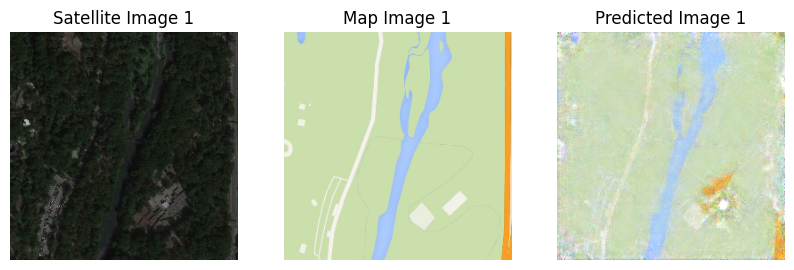

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model
generator_ = tf.keras.models.load_model('/kaggle/input/colour-300-2000/GAN_Sat_image_colour_300.h5')

def show_predictions(num_samples):
    for i in range(num_samples):
        #idx = np.random.randint(images.shape[0])
        idx = 1238
        
        image, mask = images[idx], masks[idx]
        predicted = generator_.predict(tf.expand_dims(image, axis=0))[0]

        plt.figure(figsize=(10,8))

        plt.subplot(1,3,1)
        plt.imshow(image)
        plt.title("Satellite Image " + str(i + 1))
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(mask)
        plt.title("Map Image " + str(i + 1))
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(predicted)
        plt.title("Predicted Image " + str(i + 1))
        plt.axis('off')

        plt.show()

show_predictions(1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the saved model
generator = tf.keras.models.load_model('/content/drive/MyDrive/GAN_Sat_image_map.keras')

def load_and_predict(image_path):
    combined_image = tf.cast(img_to_array(load_img(image_path)), tf.float32)

    image = combined_image

    image = (tf.image.resize(image, (256, 256))) / 255

    predicted = generator.predict(tf.expand_dims(image, axis=0))[0]

    plt.figure(figsize=(10, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Satellite Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.title("Map Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(predicted)
    plt.title("Predicted Image")
    plt.axis('off')

    plt.show()

# Example usage
image_path = "/content/Screenshot 2024-02-28 at 7.29.11 PM.png"
load_and_predict(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


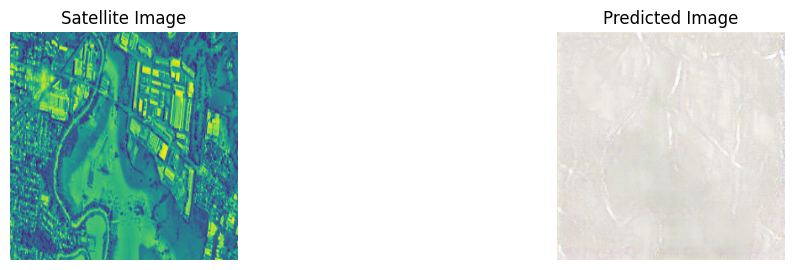

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the saved model
generator = tf.keras.models.load_model('/kaggle/input/300-model-grey-scale-road-segmentation/GAN_Sat_image_grey_300.h5')

def load_and_predict(image_path):
    combined_image = tf.cast(img_to_array(load_img(image_path)), tf.float32)

    image = combined_image

    #image = (tf.image.resize(image, (256, 256))) / 255
    
    image = tf.image.rgb_to_grayscale(tf.image.resize(image,(256,256)))/255
    predicted = generator.predict(tf.expand_dims(image, axis=0))[0]

    plt.figure(figsize=(10, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Satellite Image")
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(predicted)
    plt.title("Predicted Image")
    plt.axis('off')

    plt.show()

# Example usage
image_path = "/kaggle/input/hhhhhhuhihuh/images.jpeg"
load_and_predict(image_path)


In [ ]:
#grey
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the saved model
generator_ = tf.keras.models.load_model('/kaggle/working/fold/GAN_Sat_image_colour_300.h5')

def load_and_predict(image_path):
    combined_image = tf.cast(img_to_array(load_img(image_path)), tf.float32)

    image = combined_image

    image = tf.image.rgb_to_grayscale(tf.image.resize(image,(256,256)))/255

    predicted = generator_.predict(tf.expand_dims(image, axis=0))[0]

    plt.figure(figsize=(10, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Satellite Image")
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(predicted)
    plt.title("Predicted Image")
    plt.axis('off')

    plt.show()

# Example usage
image_path = "/kaggle/input/thisislongdatasetuselessfortesting/Photo from Abhigyan.jpg"
load_and_predict(image_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the saved model
generator_ = tf.keras.models.load_model('/kaggle/working/GAN_Sat_image_map_2000_100.keras')

def load_and_predict(image_path, patch_size=(256, 256), stride=(128, 128)):
    # Load the image
    combined_image = img_to_array(load_img(image_path))

    # Determine dimensions of the input image
    height, width, _ = combined_image.shape

    # Initialize empty arrays to store predicted patches and their positions
    predicted_patches = []
    positions = []

    # Iterate over the image using sliding windows
    for y in range(0, height - patch_size[0] + 1, stride[0]):
        for x in range(0, width - patch_size[1] + 1, stride[1]):
            # Extract the patch
            patch = combined_image[y:y+patch_size[0], x:x+patch_size[1]]

            # Preprocess the patch
            patch = tf.cast(patch, tf.float32) / 255
            patch = tf.image.resize(patch, (256, 256))

            # Predict on the patch
            predicted_patch = generator_.predict(tf.expand_dims(patch, axis=0))[0]

            # Store the predicted patch and its position
            predicted_patches.append(predicted_patch)
            positions.append((y, x))

    # Combine predicted patches into one image
    predicted_image = np.zeros_like(combined_image)

    for patch, (y, x) in zip(predicted_patches, positions):
        predicted_image[y:y+patch_size[0], x:x+patch_size[1]] = patch

    # Plot the original image and predicted image
    plt.figure(figsize=(10, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(combined_image / 255)
    plt.title("Satellite Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_image)
    plt.title("Predicted Image")
    plt.axis('off')

    plt.show()

# Example usage
image_path = "/kaggle/input/hhhhhhuhihuh/images (5).jpeg"
load_and_predict(image_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the saved model
generator_ = tf.keras.models.load_model('/kaggle/working/fold/GAN_Sat_image_colour_300.h5')

def load_and_predict(image_path, patch_size=(256, 256), stride=(128, 128)):
    # Load the image
    combined_image = img_to_array(load_img(image_path))


    # Determine dimensions of the input image
    height, width, _ = combined_image.shape

    # Initialize empty arrays to store predicted patches and their positions
    predicted_patches = []
    positions = []

    # Iterate over the image using sliding windows
    for y in range(0, height - patch_size[0] + 1, stride[0]):
        for x in range(0, width - patch_size[1] + 1, stride[1]):
            # Extract the patch
            patch = combined_image[y:y+patch_size[0], x:x+patch_size[1]]

            # Preprocess the patch
            patch = tf.cast(patch, tf.float32) / 255
            patch = tf.image.resize(patch, (256, 256))
            patch = tf.image.rgb_to_grayscale(tf.image.resize(patch,(256,256)))/255

            # Predict on the patch
            predicted_patch = generator_.predict(tf.expand_dims(patch, axis=0))[0]

            # Store the predicted patch and its position
            predicted_patches.append(predicted_patch)
            positions.append((y, x))

    # Combine predicted patches into one image
    predicted_image = np.zeros_like(combined_image)

    for patch, (y, x) in zip(predicted_patches, positions):
        predicted_image[y:y+patch_size[0], x:x+patch_size[1]] = patch

    # Plot the original image and predicted image
    plt.figure(figsize=(10, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(combined_image / 255)
    plt.title("Satellite Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_image)
    plt.title("Predicted Image")
    plt.axis('off')

    # Save the predicted image in maximum quality
    plt.savefig('predicted_image_max_quality.jpg')
    plt.show()

# Example usage
image_path = "/kaggle/input/colour-300-2000/GAN_Sat_image_colour_300.h5"
load_and_predict(image_path)


In [ ]:
import shutil

# Copy the model file to a writable directory
shutil.copy('/kaggle/input/thththththththtththth/GAN_Sat_image_map_2000_100.keras', '/kaggle/working/')

# Load the saved model from the new location
generator_ = tf.keras.models.load_model('/kaggle/working/GAN_Sat_image_map_2000_100.keras')


In [ ]:
import shutil

# Copy the model file to a writable directory
shutil.copy('/kaggle/input/colour-300-2000/GAN_Sat_image_colour_300.h5', '/kaggle/working/fold/')

# Load the saved model from the new location


In [ ]:
!mkdir fold

In [ ]:
import numpy as np
import tensorflow as tf

# Load the saved model
generator_ = tf.keras.models.load_model('/kaggle/working/fold/GAN_Sat_image_grey_100.h5')

def calculate_accuracy(images, masks, num_samples=100, threshold=0.1):
    idx = np.random.choice(images.shape[0], num_samples, replace=False)
    selected_images = images[idx]
    selected_masks = masks[idx]

    correct_predictions = 0

    for i in range(num_samples):
        image = selected_images[i]
        mask = selected_masks[i]
        
        predicted = generator_.predict(tf.expand_dims(image, axis=0))[0]

        # Apply threshold to predicted image
        predicted_binary = (predicted > threshold).astype(np.float32)

        # Calculate accuracy
        if np.mean(np.abs(predicted_binary - mask)) < threshold:
            correct_predictions += 1
    
    accuracy = (correct_predictions / num_samples) * 100
    return accuracy

# Example usage
accuracy = calculate_accuracy(images, masks, num_samples=30, threshold=0.25)
print("Accuracy:", accuracy)


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder containing images
image_folder_path = "/kaggle/input/qeqweqweqw/map images/images"

# Folder containing masks
mask_folder_path = "/kaggle/input/qeqweqweqw/map images/masks"

# Get a list of all files in the image folder
image_file_list = sorted(os.listdir(image_folder_path))

# Get a list of all files in the mask folder
mask_file_list = sorted(os.listdir(mask_folder_path))

# Initialize empty lists to store images and masks
images = []
masks = []

# Function to crop the image to 256x256 from the center
def crop_center(image, crop_width, crop_height):
    width, height = image.size
    left = (width - crop_width) // 2
    top = (height - crop_height) // 2
    right = (width + crop_width) // 2
    bottom = (height + crop_height) // 2
    return image.crop((left, top, right, bottom))

# Iterate through the image files
for image_file, mask_file in zip(image_file_list, mask_file_list):
    # Check if the files are images
    if image_file.endswith(".png") and mask_file.endswith(".png"):
        # Open the image using PIL
        image = Image.open(os.path.join(image_folder_path, image_file))
        # Open the mask using PIL
        mask = Image.open(os.path.join(mask_folder_path, mask_file))
        # Crop the image and mask to 256x256 from the center
        image = crop_center(image, 256, 256)
        mask = crop_center(mask, 256, 256)
        # Append the cropped image and mask to their respective lists
        images.append(image)
        masks.append(mask)

# Display images and masks side by side
num_images = len(images)
plt.figure(figsize=(12, 6*num_images))

for i in range(num_images):
    plt.subplot(num_images, 2, 2*i+1)
    plt.imshow(images[i])
    plt.title('Image {}'.format(i+1))
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i+2)
    plt.imshow(masks[i])
    plt.title('Mask {}'.format(i+1))
    plt.axis('off')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'images' and 'masks' arrays containing the images and masks

# Display images and masks side by side
num_images = len(images)
plt.figure(figsize=(12, 6*num_images))

for i in range(num_images):
    plt.subplot(num_images, 2, 2*i+1)
    plt.imshow(images[i])
    plt.title('Image {}'.format(i+1))
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i+2)
    plt.imshow(masks[i])
    plt.title('Mask {}'.format(i+1))
    plt.axis('off')

plt.show()


In [ ]:
images = np.array(images)
masks = np.array(masks)

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder containing images
image_folder_path = "/kaggle/input/satellitegooglemapsmasks/content/drive/MyDrive/Google maps/val/images"

# Folder containing masks
mask_folder_path = "/kaggle/input/satellitegooglemapsmasks/content/drive/MyDrive/Google maps/val/actual"

# Get a list of all files in the image folder
image_file_list = sorted(os.listdir(image_folder_path))

# Get a list of all files in the mask folder
mask_file_list = sorted(os.listdir(mask_folder_path))

# Initialize empty lists to store images and masks
images = []
masks = []

# Load only 30 images
count = 0
# Iterate through the image files
for image_file, mask_file in zip(image_file_list, mask_file_list):
    # Check if the files are images
    if image_file.endswith(".jpg") and mask_file.endswith(".jpg"):
        # Open the image using PIL and convert to grayscale
        image = Image.open(os.path.join(image_folder_path, image_file))
        # Open the mask using PIL
        mask = Image.open(os.path.join(mask_folder_path, mask_file))
        # Resize the image and mask to 256x256
        image = image.resize((256, 256))
        mask = mask.resize((256, 256))
        # Append the image and mask to their respective lists
        images.append(image)
        masks.append(mask)
        count += 1
        if count == 30:
            break

# Display images and masks side by side
num_images = len(images)
plt.figure(figsize=(12, 6*num_images))

for i in range(num_images):
    plt.subplot(num_images, 2, 2*i+1)
    plt.imshow(images[i])
    plt.title('Image {}'.format(i+1))
    plt.axis('off')
    
    plt.subplot(num_images, 2, 2*i+2)
    plt.imshow(masks[i])
    plt.title('Mask {}'.format(i+1))
    plt.axis('off')

plt.show()


In [ ]:
masks.shape

In [ ]:
generator_ = tf.keras.models.load_model('/kaggle/working/fold/GAN_Sat_image_grey_100.h5')
predicted = generator_.predict(tf.expand_dims(images[1], axis=0))[0]


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model
generator_ = tf.keras.models.load_model('/kaggle/working/GAN_Sat_image_map_2000_100.keras')

def calculate_iou(predicted_mask, actual_mask):
    intersection = np.logical_and(predicted_mask, actual_mask)
    union = np.logical_or(predicted_mask, actual_mask)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_accuracy(image_list, mask_list, threshold=0.1):
    num_samples = len(image_list)
    correct_predictions = 0
    total_iou = 0

    for image, mask in zip(image_list, mask_list):
        # Convert image to grayscale
        image_gray = image

        # Expand dimensions to match the input shape expected by the model
        image_gray = tf.expand_dims(image_gray, axis=0)
        image_gray = tf.image.resize(image_gray, [256, 256])

        predicted = generator_.predict(image_gray)[0]

        # Apply threshold to predicted image
        predicted_binary = (predicted > threshold).astype(np.float32)

        # Calculate IoU
        iou_score = calculate_iou(predicted_binary, mask)

        # Display image, predicted mask, and actual mask
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(predicted_binary, cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(mask, cmap='gray')
        plt.title('Actual Mask')
        plt.axis('off')

        plt.show()

        # Check if predicted mask has common areas with actual mask
        if iou_score > 0:
            correct_predictions += 1
            total_iou += iou_score
        
        print("IoU Score:", iou_score)

    accuracy = (correct_predictions / num_samples) * 100
    average_iou = total_iou / num_samples if num_samples != 0 else 0
    return accuracy, average_iou

# Example usage
accuracy, average_iou = calculate_accuracy(images, masks, threshold=0.8)
print("Accuracy:", accuracy)
print("Average IoU:", average_iou)


In [ ]:
import matplotlib.pyplot as plt

# Loss values for epoch 1
loss_epoch1 = [90.88813, 89.1126, 87.24744, 83.56, 81.9635, 79.78415, 77.23021, 55.323666, 55.78088, 52.50126, 40.442226, 39.716614, 19.09999, 20.042953, 16.610329, 16.856459, 17.086, 9.651217, 11.8843355, 9.432147, 9.01032]

# Loss values for epoch 2
loss_epoch2 = [12.560106, 14.542852, 10.030054, 9.108579, 10.643757, 9.346672, 8.679604, 11.264377, 11.722861, 9.291282, 7.939736, 9.27644, 9.293618, 8.26, 8.781097, 8.387758, 7.940167, 7.303936, 8.157403, 8.163767, 7.454287, 7.913557, 6.939653, 8.267, 7.9304748, 7.674531, 7.324183]

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(loss_epoch1, label='Generator')
plt.plot(loss_epoch2, label='Discriminator')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss per Batch for discriminator and generator')
plt.legend()
plt.grid(True)
plt.show()
